<a href="https://colab.research.google.com/github/Neharaaj/Airfoil-project/blob/main/Autompg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
print(tf.__version__)
import matplotlib.pyplot as plt

2.9.2


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
Auto_mpg=pd.read_csv("auto_mpg.csv")
Auto_mpg

In [ ]:
Auto_mpg.dtypes

In [ ]:
Auto_mpg['Country_code'] = Auto_mpg.origin.replace([1,2,3],['USA','Europe','India'])
Auto_mpg=pd.get_dummies(Auto_mpg,columns = ['origin'],drop_first = True)
Auto_mpg.info()

In [ ]:
Auto_mpg.dtypes

In [ ]:
Auto_mpg.shape

In [ ]:
Auto_mpg.tail(10)

In [ ]:
Auto_mpg.drop(['model year'],axis=1,inplace=True)
Auto_mpg.drop(['car name'],axis=1,inplace=True)
Auto_mpg.drop(['Country_code'],axis=1,inplace=True)

In [ ]:
Auto_mpg.isnull().sum()

In [ ]:
Auto_mpg[Auto_mpg['horsepower'].str.isnumeric()==False]

In [ ]:
Auto_mpg['horsepower'] = Auto_mpg['horsepower'].replace('?',np.NaN)
Auto_mpg['horsepower'] = Auto_mpg['horsepower'].astype(np.float64)


In [ ]:
Auto_mpg.head()

In [ ]:
Auto_mpg.shape

In [ ]:
print(Auto_mpg.dtypes)

In [ ]:
Auto_mpg['horsepower'].fillna(Auto_mpg['horsepower'].mean(),inplace = True)
Auto_mpg.head()

In [ ]:
print(Auto_mpg.dtypes)

In [ ]:
correlation = Auto_mpg.corr()

In [ ]:
print(correlation['mpg'])

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap  (correlation, annot = True) 
plt.show()

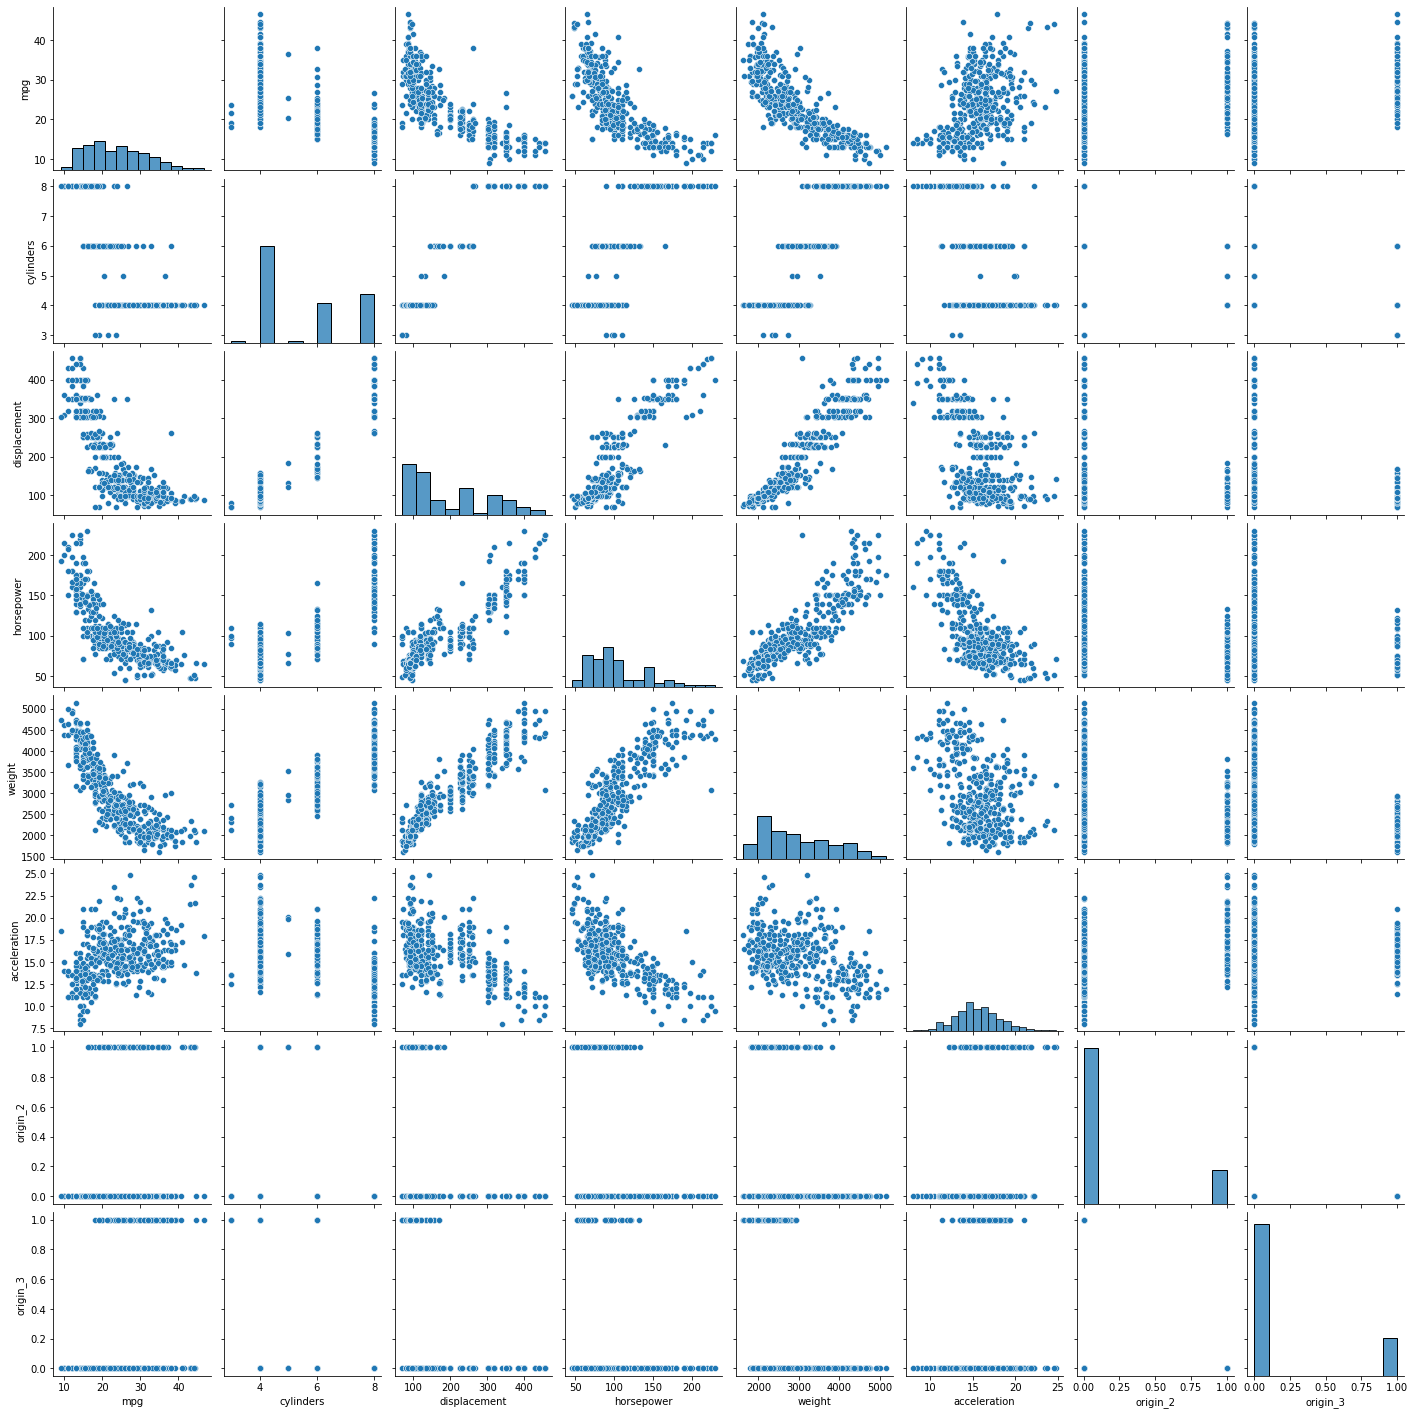

In [22]:
sns.pairplot(Auto_mpg)
plt.show()

In [ ]:
x= Auto_mpg.drop("mpg", axis=1)
y= Auto_mpg["mpg"]


In [24]:
x.head

<bound method NDFrame.head of      cylinders  displacement  horsepower  weight  acceleration  origin_2  \
0            8         307.0       130.0    3504          12.0         0   
1            8         350.0       165.0    3693          11.5         0   
2            8         318.0       150.0    3436          11.0         0   
3            8         304.0       150.0    3433          12.0         0   
4            8         302.0       140.0    3449          10.5         0   
..         ...           ...         ...     ...           ...       ...   
393          4         140.0        86.0    2790          15.6         0   
394          4          97.0        52.0    2130          24.6         1   
395          4         135.0        84.0    2295          11.6         0   
396          4         120.0        79.0    2625          18.6         0   
397          4         119.0        82.0    2720          19.4         0   

     origin_3  
0           0  
1           0  
2        

In [ ]:
y.head

<bound method NDFrame.head of 0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64>

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, train_size=0.8)
y_test

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                          
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 300,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 5)                 40        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epochs')

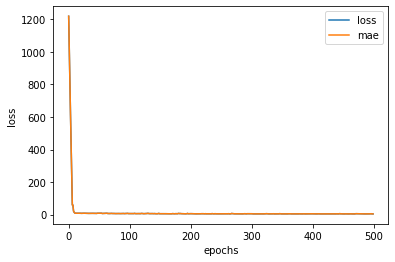

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 100,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 5.1693 - mae: 5.1693


[5.169312000274658, 5.169312000274658]

Text(0.5, 0, 'epochs')

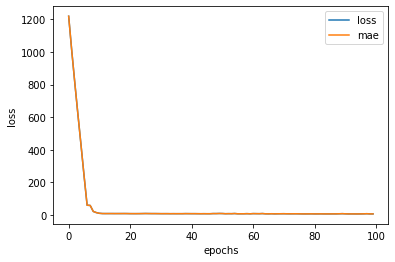

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 200,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 4.4471 - mae: 4.4471


[4.447088718414307, 4.447088718414307]

Text(0.5, 0, 'epochs')

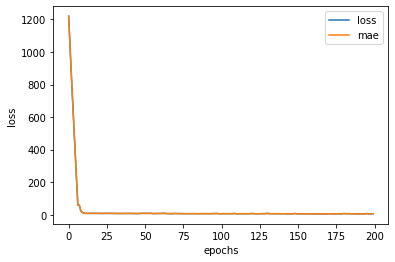

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 300,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 4.2902 - mae: 4.2902


[4.290210247039795, 4.290210247039795]

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 8ms/step - loss: 4.6519 - mae: 4.6519


[4.651919364929199, 4.651919364929199]

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 500,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 3.9983 - mae: 3.9983


[3.998255968093872, 3.998255968093872]

Text(0.5, 0, 'epochs')

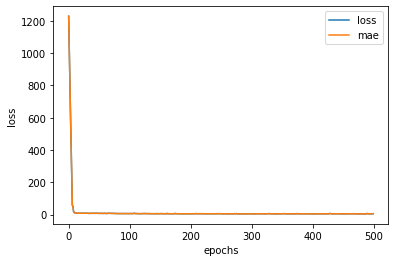

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 100,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 6.7051 - mae: 6.7051


[6.705131530761719, 6.705131530761719]

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 200,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 4.7356 - mae: 4.7356


[4.735606670379639, 4.735606670379639]

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 300,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 6.0406 - mae: 6.0406


[6.040572643280029, 6.040572643280029]

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 7.3207 - mae: 7.3207


[7.320737838745117, 7.320737838745117]

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 4.1026 - mae: 4.1026


[4.102597713470459, 4.102597713470459]

Text(0.5, 0, 'epochs')

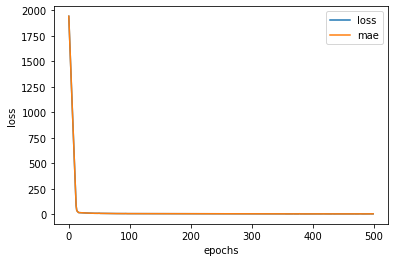

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 4.2433 - mae: 4.2433


[4.243258953094482, 4.243258953094482]

Text(0.5, 0, 'epochs')

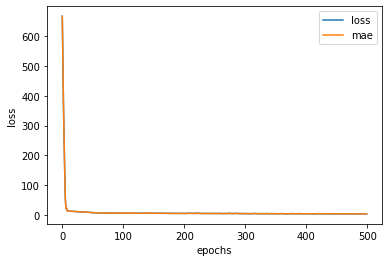

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 4.0113 - mae: 4.0113


[4.011345863342285, 4.011345863342285]

Text(0.5, 0, 'epochs')

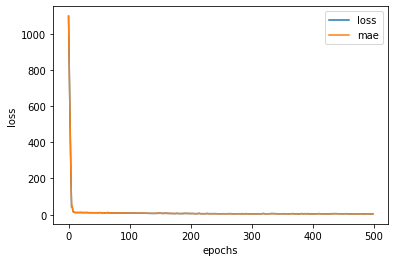

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, train_size=0.8)
y_test

233    29.0
397    31.0
240    30.5
287    16.5
264    18.1
       ... 
82     23.0
42     12.0
17     21.0
117    29.0
60     20.0
Name: mpg, Length: 80, dtype: float64

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs=400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 7ms/step - loss: 4.3130 - mae: 4.3130


[4.313042640686035, 4.313042640686035]

Text(0.5, 0, 'epochs')

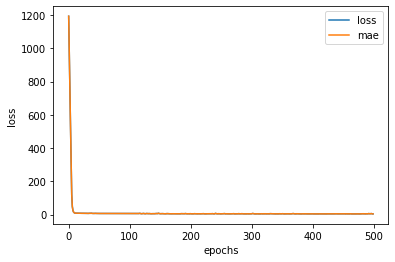

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs=400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 4.5108 - mae: 4.5108


[4.5107622146606445, 4.5107622146606445]

Text(0.5, 0, 'epochs')

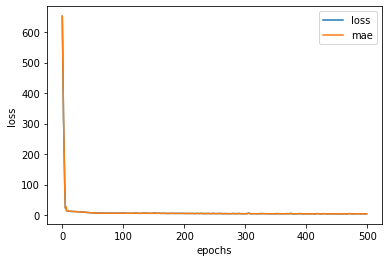

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs=400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 4.4263 - mae: 4.4263


[4.426316261291504, 4.426316261291504]

Text(0.5, 0, 'epochs')

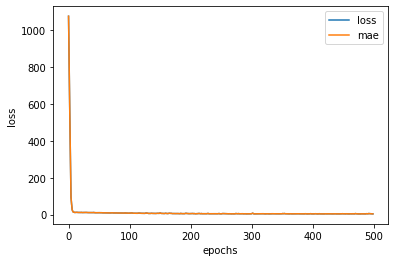

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs=400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 4.4603 - mae: 4.4603


[4.460282325744629, 4.460282325744629]

Text(0.5, 0, 'epochs')

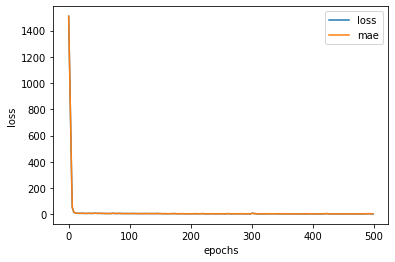

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs=400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 4.5863 - mae: 4.5863


[4.586334228515625, 4.586334228515625]

In [ ]:
model.summary();

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 8)                 64        
                                                                 
 dense_55 (Dense)            (None, 1)                 9         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epochs')

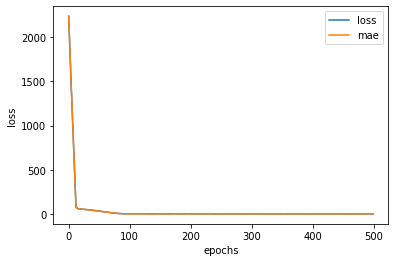

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, train_size=0.75)
y_test

369    34.0
394    44.0
303    31.8
89     15.0
291    19.2
       ... 
179    22.0
308    33.5
24     21.0
71     19.0
238    33.5
Name: mpg, Length: 100, dtype: float64

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 4.0799 - mae: 4.0799


[4.079906463623047, 4.079906463623047]

In [ ]:
model.summary();

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 64        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epochs')

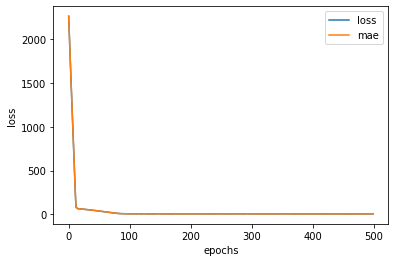

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 500,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 5.6436 - mae: 5.6436


[5.643575668334961, 5.643575668334961]

Text(0.5, 0, 'epochs')

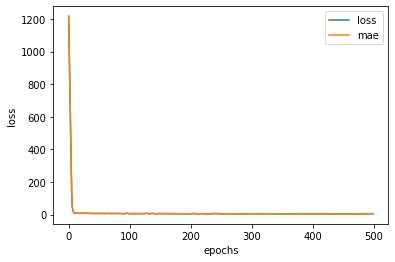

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 5.2568 - mae: 5.2568


[5.256759166717529, 5.256759166717529]

Text(0.5, 0, 'epochs')

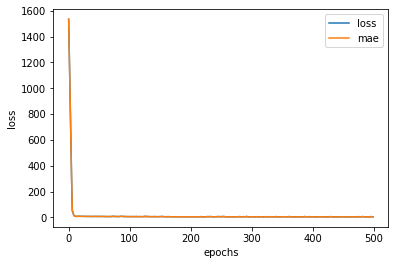

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 4.8901 - mae: 4.8901


[4.890100002288818, 4.890100002288818]

Text(0.5, 0, 'epochs')

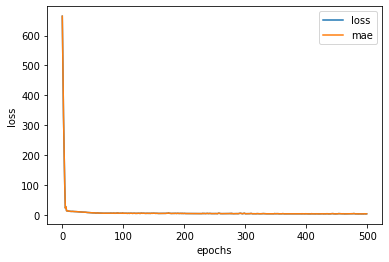

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 500,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 4.5942 - mae: 4.5942


[4.5941596031188965, 4.5941596031188965]

Text(0.5, 0, 'epochs')

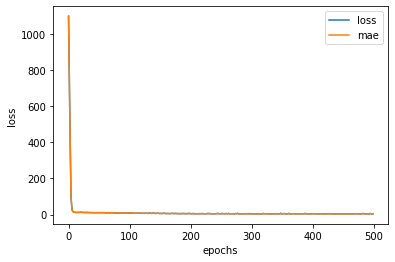

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.35, train_size=0.65)
y_test

108    20.0
132    25.0
258    20.6
381    36.0
239    30.0
       ... 
69     12.0
389    22.0
106    12.0
367    28.0
302    34.5
Name: mpg, Length: 140, dtype: float64

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 4.2769 - mae: 4.2769


[4.276853084564209, 4.276853084564209]

In [ ]:
model.summary();

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_216 (Dense)           (None, 8)                 64        
                                                                 
 dense_217 (Dense)           (None, 1)                 9         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epochs')

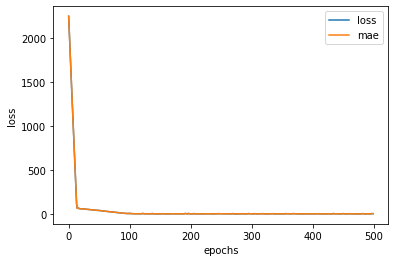

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 5.4668 - mae: 5.4668


[5.466805934906006, 5.466805934906006]

Text(0.5, 0, 'epochs')

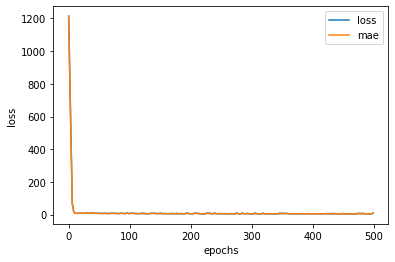

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 6.1742 - mae: 6.1742


[6.1741766929626465, 6.1741766929626465]

Text(0.5, 0, 'epochs')

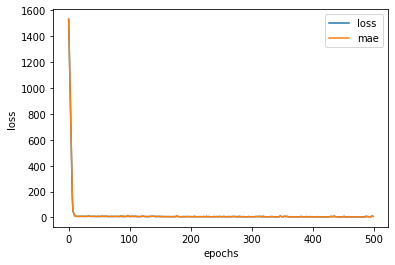

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 5.7540 - mae: 5.7540


[5.7540459632873535, 5.7540459632873535]

Text(0.5, 0, 'epochs')

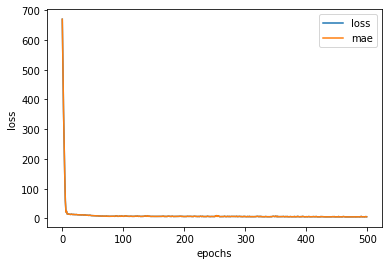

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 4.5691 - mae: 4.5691


[4.569083213806152, 4.569083213806152]

Text(0.5, 0, 'epochs')

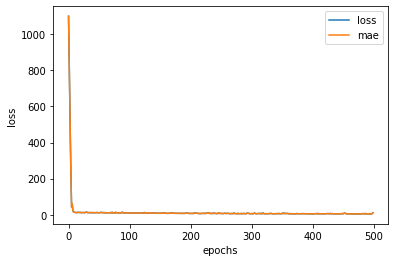

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.40, train_size=0.60)
y_test

44     13.0
193    24.0
18     27.0
127    19.0
112    19.0
       ... 
119    20.0
395    32.0
179    22.0
73     13.0
173    24.0
Name: mpg, Length: 160, dtype: float64

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 4.4071 - mae: 4.4071


[4.407065391540527, 4.407065391540527]

In [ ]:
model.summary();

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 8)                 72        
                                                                 
 dense_55 (Dense)            (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epochs')

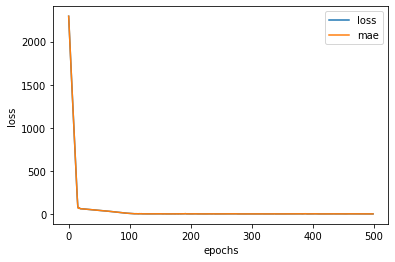

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 6.0492 - mae: 6.0492


[6.049197196960449, 6.049197196960449]

Text(0.5, 0, 'epochs')

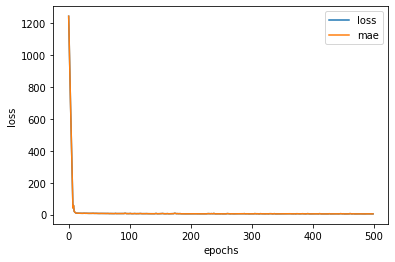

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(4),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 4.3893 - mae: 4.3893


[4.389313697814941, 4.389313697814941]

Text(0.5, 0, 'epochs')

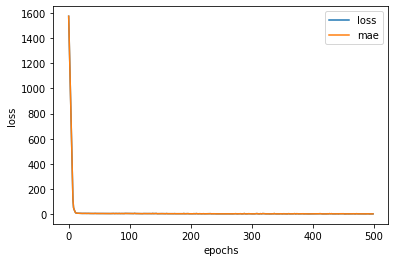

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 4.5633 - mae: 4.5633


[4.56332540512085, 4.56332540512085]

Text(0.5, 0, 'epochs')

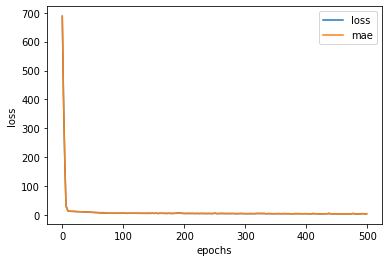

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(20)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(8),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])
history= model.fit(x_train, y_train, epochs= 400,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 4.3348 - mae: 4.3348


[4.334826946258545, 4.334826946258545]

Text(0.5, 0, 'epochs')

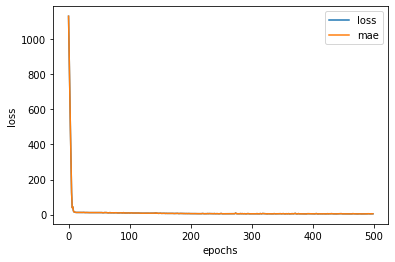

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")